# <center>Is Technical Analysis  Really Profitable?</center>
 

**Authors**

1. Name: WANG, Zichen              Student ID 20882359
2. Name: LUO, Yiling                          Student ID 20881826


## Introduction

Technical analysis is a trading tool employed to evaluate securities and attempt to forecast the future movement of stock price by analyzing statistics gathered from trading activity, such as price movement and volume. Unlike fundamental analysts who attempt to evaluate a security's intrinsic value, technical analysts focus on charts of price movement and various analytical tools to evaluate a security's strength or weakness and forecast future price changes.



Over the years, numerous technical indicators have been developed by analysts in attempts to accurately forecast future price movements. Some indicators are focused primarily on identifying the current market trend, including support and resistance areas, while others are focused on determining the strength of a trend and the likelihood of its continuation. Commonly used technical indicator, **moving averages(MA)**, **exponential moving average(EMA)** and **moving average convergence divergence** (MACD).



For example, consider a series of daily stock price $S_1,S_2,S_3,...S_{10},..$. The moving average with window size k on day t, is computed as 
$$
MA_t(k)=\frac{S_{t-k+1}+S_{t-k+2}+\ldots+S_t}{k}
$$


In pandas, we use rolling method to compute moving average. 

EMA on day t with window size k, is 
$$
EMA_t(k)=\frac{S_t+(1-\alpha)S_{t-1}+(1-\alpha)^2S_{t-2}+(1-\alpha)^{k-1}S_{t-k+1}}{1+(1-\alpha)+(1-\alpha)^2+\ldots+(1-\alpha)^{k-1}}
$$
with $\alpha=\frac{2}{k+1}$. Basically $EMA$ is weighted average which puts more weight on recent price.

The computation of MACD is straight forward which is the difference of two EMA with different time window.
$$
MACD_t(k_1,k_2)=EMA_t(k_1)-EMA_t(k_2)
$$
In practice, we use $MACD_t(12,26)$, that, we use EMA with window size 12 and 26 to compute MACD.

In this project, you need to computer whether there is any association between price change one day ahead, $\Delta_t$:
$$
\Delta_t=S_{t+1}-S_t
$$
and three indicators $MA_t,EMA_t, MACD_t$.  You need to apply what you learned in the lecture to complete this project following instructions below.  I will color all tasks you need to do in red. 

## 1.  Prepapre Data

In this section, you need to learn how to install new module and how to explore the function of the module. 


We will download stock price data and we need the module "yahoo_fin". <span style="color:red;font-size:15px">Please install the "yahoo_fin" and import module to download last 4 years' daily stock price of Alibaba.</span>

In [ ]:
!pip install yahoo_fin

In [ ]:
from yahoo_fin.stock_info import get_data
import pandas as pd
import numpy as np

In [ ]:
BABA = get_data("BABA", start_date = "11/11/2018", end_date = "11/11/2022", index_as_date = True, interval = "1d")
BABA.head()

,open,high,low,close,adjclose,volume,ticker
2018-11-12,145.009995,146.406006,139.970001,142.820007,142.820007,16516500,BABA
2018-11-13,144.830002,149.940002,143.910004,146.979996,146.979996,19575100,BABA
2018-11-14,150.210007,152.149994,148.440002,150.440002,150.440002,21786000,BABA
2018-11-15,152.899994,157.399994,150.889999,156.220001,156.220001,30083500,BABA
2018-11-16,155.039993,155.800003,152.141998,154.100006,154.100006,20039400,BABA


## 2.   Build New Variables 
Building new variables are the most important data preprocessing skill. We can use rolling  with apply and other pandas methods.  It is so flexible and therefore very challenging. 
<span style="color:red;font-size:15px">Build $\Delta_t$, $MA_t(12)$, $MA_t(26)$, $EMA_t(12),EMA_t(26),MACD_t(12,26)$. Notice that you cannot use built-in methods for MA, EMA and MACD, e.g. rolling(26).mean(), ema() etc. You may use rolling and apply.</span>


### 2.1 $\Delta_t$

In [ ]:
alibaba = BABA.close
delta_t = pd.Series(alibaba.diff().shift(-1).dropna(), name = 'delta_t')

### 2.2 $MA_t(12)$

In [ ]:
MA_12 = pd.Series(alibaba.rolling(12).apply(np.mean).dropna(), name = 'MA_12')

### 2.3 $MA_t(26)$

In [ ]:
MA_26 = pd.Series(alibaba.rolling(26).apply(np.mean).dropna(), name = 'MA_26')

### 2.4 $EMA_t(12)$

In [ ]:
def EMA_t(cp_k): #cp_k :k days close prices, datatype: series
  k = len(cp_k)
  alpha = 2/(k+1)
  w = np.logspace(k-1, 0, k, base = 1-alpha) #arithmetic progression

  deno = w.sum() # denominator
  nomi = cp_k.multiply(w).sum() # nominator
  return nomi/deno
  
EMA_t12 = pd.Series(alibaba.rolling(12).apply(EMA_t).dropna(), name='EMA_t12')
print(EMA_t12)

2018-11-28    153.268761
2018-11-29    154.054403
2018-11-30    155.433852
2018-12-03    157.030264
2018-12-04    157.282536
                 ...    
2022-11-04     66.245853
2022-11-07     66.723473
2022-11-08     66.842861
2022-11-09     66.575205
2022-11-10     67.223587
Name: EMA_t12, Length: 996, dtype: float64


### 2.4 $EMA_t(26)$

In [ ]:
EMA_t26 = pd.Series(alibaba.rolling(26).apply(EMA_t).dropna(), name='EMA_t26')
print(EMA_t26)

2018-12-19    150.352674
2018-12-20    149.134300
2018-12-21    147.691614
2018-12-24    146.306303
2018-12-26    145.480021
                 ...    
2022-11-04     69.645555
2022-11-07     69.531279
2022-11-08     69.284807
2022-11-09     68.732402
2022-11-10     68.639951
Name: EMA_t26, Length: 982, dtype: float64


### 2.5 $MACD_t(12,26)$

In [ ]:
MACD = pd.Series(EMA_t12 - EMA_t26, name = 'MACD(12,26)')

## 3. Visualization of Variables  
We have built 5 predictor varaibles and 1 response variable $\Delta_t$. <span style="color:red;font-size:15px">Could you draw scatter plot in between each of  $MA_t(12)$, $MA_t(26)$, $EMA_t(12),EMA_t(26),MACD_t(12,26)$ and  $\Delta_t$ using plotly and make_subplots(rows=5)? Could you tell any obvious linear or nonlinear pattern from plots?</span>

**Answer:**
There is no obvious linear or nonlinear pattern from plots.

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.concat([delta_t, MA_12, MA_26, EMA_t12, EMA_t26, MACD], axis = 1)
data['YYYYmm'] = data.index.map(lambda x: x.year*100+x.month)
data['Year'] = data.index.year

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=5, shared_xaxes=True)
fig1 = go.Scatter(x=data.delta_t, y=data.MA_12, mode='markers',name='MAt_12')
fig2 = go.Scatter(x=data.delta_t, y=data.MA_26, mode='markers',name='MAt_26')
fig3 = go.Scatter(x=data.delta_t, y=data.EMA_t12, mode='markers',name='EMA_t12')
fig4 = go.Scatter(x=data.delta_t, y=data.EMA_t26, mode='markers',name='EMA_t26')
fig5 = go.Scatter(x=data.delta_t, y=data['MACD(12,26)'], mode='markers',name='MACD(12,26)')

fig.append_trace(fig1, row=1, col=1)

fig.append_trace(fig2, row=2, col=1)

fig.append_trace(fig3, row=3, col=1)

fig.append_trace(fig4, row=4, col=1)

fig.append_trace(fig5, row=5, col=1)

fig.update_layout(height=600, width=800, title_text="Stacked Subplots")
fig.show()

In [ ]:
data_plot = data.melt(id_vars=['delta_t','Year','YYYYmm'],
                 value_vars=['MA_12', 'MA_26', 'EMA_t12', 'EMA_t26', 'MACD(12,26)'],
                 var_name="indicator",value_name="Value")


In [ ]:
# To see the relationship between each predictor and delta_t in one year
px.scatter(data_plot, x='delta_t', y='Value', 
           animation_frame='Year', 
           facet_row="indicator",
           width=800, 
           height=1000, 
           range_y=[-100,400],
           range_x=[-20,20],
          )

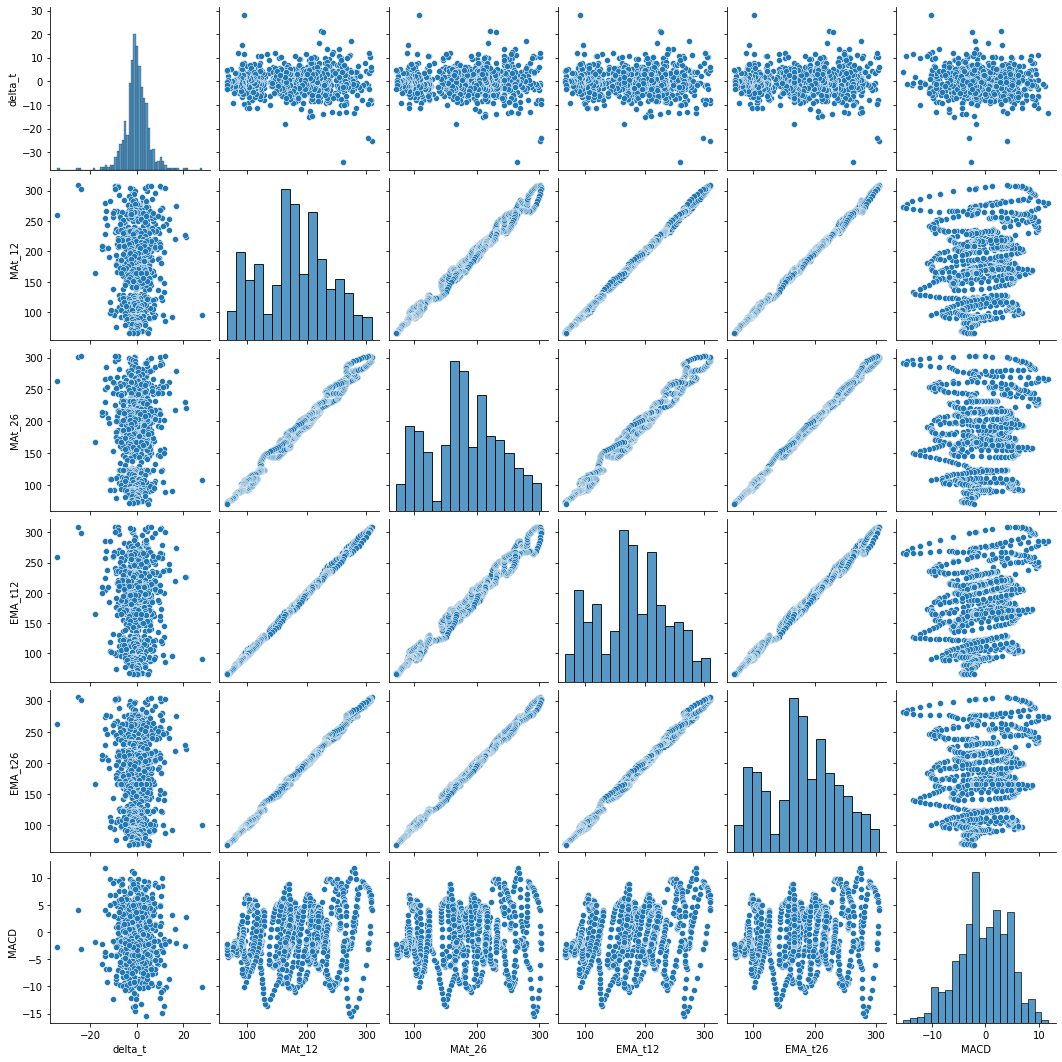

In [ ]:
sns.pairplot(data)

## 4. Measurement of Nonlinear Pattern.

It is very important to identify predictors which has nonlinear pattern with the reponse. In previous task we have explored it with scatterplot. In this section, 
 <span style="color:red;font-size:15px">please use measures of nonlinear association we learned to evaluate if there are  any predictors from $MA_t(12)$, $MA_t(26)$, $EMA_t(12),EMA_t(26),MACD_t(12,26)$ assciated with $\Delta_t$.</span> 

**Answer:**

We have used 
* Spearman and Kendall correlation coefficients to evaluate the monotonic relationship, 
* and used Hoeffding dependence coefficient and Distance correlation to evaluate the nonmonotonic and nonlinear association. 

The result ("Measure") shows that 
* **the nonlinear association** between each predictor and $\Delta_t$ is **very low** since the Distance correlation is about 0.1 
* and there is almost **no monotonic relationship** between each predictor and $\Delta_t$ since both Spearman and Kendall correlation coefficients are close to zero .

In [ ]:
from scipy.stats import rankdata
from scipy.signal import decimate
import math
import time
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def hoeffding(*arg):
  
    if(len(arg)==1):
      if isinstance(arg[0], pd.DataFrame):
        if(arg[0].shape[0]>1):
          return arg[0].apply(lambda x: arg[0].apply(lambda y:hoeffding(x.values, y.values)))
    else:
      if(len(arg)==2):
        if type(arg[0]) is not np.ndarray:
          if (len(arg[0].shape)>1):
            return print("ERROR inputs : efficienthoeffdingsD(df >2col) or efficienthoeffdingsD(numpy.array -1d- ,numpy.array -1d-)")
        if type(arg[1]) is np.ndarray:
          if (len(arg[0].shape)>1):
            return print("ERROR inputs : efficienthoeffdingsD(df >2col) or efficienthoeffdingsD(numpy.array -1d- ,numpy.array -1d-)")
        
        xin=arg[0]
        yin=arg[1]
        #crop data to the smallest array, length have to be equal
        if len(xin)<len(yin):
          yin=yin[:len(xin)]
        if len(xin)>len(yin):
          xin=xin[:len(yin)]

        # dropna
        x = xin[~(np.isnan(xin) | np.isnan(yin))]
        y = yin[~(np.isnan(xin) | np.isnan(yin))]

        # undersampling if length too long
        lenx=len(x)
        if lenx>99999:
            factor=math.ceil(lenx/100000)
            x=x[::factor]
            y=y[::factor]

        # bining if too much "definition"
        if len(np.unique(x))>50:
            est = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='quantile') #faster strategy='quantile' but less accurate
            est.fit(x.reshape(-1, 1))  
            Rtemp = est.transform(x.reshape(-1, 1))
            R=rankdata(Rtemp)
        else:
            R=rankdata(x)
        if len(np.unique(y))>50:
            est1 = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='quantile') #faster strategy='quantile' but less accurate
            est1.fit(y.reshape(-1, 1))  
            Stemp = est1.transform(y.reshape(-1, 1))
            S=rankdata(Stemp)
        else:
            S=rankdata(y)      

        # core processing
        N=x.shape
        dico={(np.nan,np.nan):np.nan}
        dicoRin={np.nan:np.nan}
        dicoSin={np.nan:np.nan}
        dicoRless={np.nan:np.nan}
        dicoSless={np.nan:np.nan}
        Q=np.ones(N[0])

        i=0;
        for r,s in np.nditer([R,S]):
            r=float(r)
            s=float(s)
            if (r,s) in dico.keys():
                Q[i]=dico[(r,s)]
            else:
              if r in dicoRin.keys():
                  isinR=dicoRin[r]
                  lessR=dicoRless[r]
              else:
                  isinR=np.isin(R,r)
                  dicoRin[r]=isinR
                  lessR=np.less(R,r)
                  dicoRless[r]=lessR

              if s in dicoSin.keys():
                  isinS=dicoSin[s]
                  lessS=dicoSless[s]
              else:
                  isinS=np.isin(S,s)
                  dicoSin[s]=isinS
                  lessS=np.less(S,s)
                  dicoSless[s]=lessS


              Q[i] = Q[i] + np.count_nonzero(lessR & lessS) \
                    + 1/4 * (np.count_nonzero(isinR & isinS)-1) \
                    + 1/2 * (np.count_nonzero(isinR & lessS)) \
                     + 1/2 * (np.count_nonzero(lessR & isinS)) 
              dico[(r,s)]=Q[i]
            i+=1

        D1 = np.sum( np.multiply((Q-1),(Q-2)) );
        D2 = np.sum( np.multiply(np.multiply((R-1),(R-2)),np.multiply((S-1),(S-2)) ) );
        D3 = np.sum( np.multiply(np.multiply((R-2),(S-2)),(Q-1)) );

        D = 30*((N[0]-2)*(N[0]-3)*D1 + D2 - 2*(N[0]-2)*D3) / (N[0]*(N[0]-1)*(N[0]-2)*(N[0]-3)*(N[0]-4));


        return D
      return print("ERROR inputs : efficienthoeffdingsD(df >2col) or efficienthoeffdingsD(numpy.array -1d- ,numpy.array -1d-)")

In [ ]:
from scipy.spatial.distance import pdist, squareform
def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor


In [ ]:
data_m = data.dropna()
Measure = pd.DataFrame(index = ['MA_12', 'MA_26', 'EMA_t12', 'EMA_t26', 'MACD(12,26)'],
                     columns = ["Spearman", "Kendall", "Hoeffding", "Distance"])


In [ ]:
Measure.loc["MA_12","Spearman"]=data_m[['MA_12','delta_t']].corr("spearman").iloc[0,1]
Measure.loc["MA_12","Kendall"]=data_m[['MA_12','delta_t']].corr("kendall").iloc[0,1]
Measure.loc["MA_12","Hoeffding"] = hoeffding(data_m[['MA_12','delta_t']]).iloc[0,1]
Measure.loc["MA_12","Distance"]=distcorr(data_m['MA_12'],data_m['delta_t'])

In [ ]:
Measure.loc["MA_26","Spearman"]=data_m[['MA_26','delta_t']].corr("spearman").iloc[0,1]
Measure.loc["MA_26","Kendall"]=data_m[['MA_26','delta_t']].corr("kendall").iloc[0,1]
Measure.loc["MA_26","Hoeffding"] = hoeffding(data_m[['MA_26','delta_t']]).iloc[0,1]
Measure.loc["MA_26","Distance"]=distcorr(data_m['MA_26'],data_m['delta_t'])

In [ ]:
Measure.loc["EMA_t12","Spearman"]=data_m[['EMA_t12','delta_t']].corr("spearman").iloc[0,1]
Measure.loc["EMA_t12","Kendall"]=data_m[['EMA_t12','delta_t']].corr("kendall").iloc[0,1]
Measure.loc["EMA_t12","Hoeffding"] = hoeffding(data_m[['EMA_t12','delta_t']]).iloc[0,1]
Measure.loc["EMA_t12","Distance"]=distcorr(data_m['EMA_t12'],data_m['delta_t'])

In [ ]:
Measure.loc["EMA_t26","Spearman"]=data_m[['EMA_t26','delta_t']].corr("spearman").iloc[0,1]
Measure.loc["EMA_t26","Kendall"]=data_m[['EMA_t26','delta_t']].corr("kendall").iloc[0,1]
Measure.loc["EMA_t26","Hoeffding"] = hoeffding(data_m[['EMA_t26','delta_t']]).iloc[0,1]
Measure.loc["EMA_t26","Distance"]=distcorr(data_m['EMA_t26'],data_m['delta_t'])

In [ ]:
Measure.loc["MACD(12,26)","Spearman"]=data_m[['MACD(12,26)','delta_t']].corr("spearman").iloc[0,1]
Measure.loc["MACD(12,26)","Kendall"]=data_m[['MACD(12,26)','delta_t']].corr("kendall").iloc[0,1]
Measure.loc["MACD(12,26)","Hoeffding"] = hoeffding(data_m[['MACD(12,26)','delta_t']]).iloc[0,1]
Measure.loc["MACD(12,26)","Distance"]=distcorr(data_m['MACD(12,26)'],data_m['delta_t'])

In [ ]:
Measure

,Spearman,Kendall,Hoeffding,Distance
MA_12,0.006391,0.005614,0.001118,0.103542
MA_26,0.004836,0.005106,0.001359,0.111561
EMA_t12,0.003014,0.002713,0.001027,0.102143
EMA_t26,0.004868,0.004386,0.001218,0.107388
"MACD(12,26)",0.001272,0.001852,0.000226,0.078512
